In [50]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import spacy


In [51]:
tqdm.pandas()
spacy_eng = spacy.load("en_core_web_sm")
lemm = WordNetLemmatizer()
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 18
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\sogut\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\sogut\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\sogut\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\sogut\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\sogut\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [52]:
train = pd.read_csv('Data\Corona_NLP_test.csv')
test = pd.read_csv("Data\Corona_NLP_test.csv")
train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [53]:
train.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [54]:
train.drop(['UserName', 'ScreenName','Location', 'TweetAt' ], axis=1, inplace=True)
train

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Extremely Negative


In [55]:
test.drop(['UserName', 'ScreenName','Location', 'TweetAt' ], axis=1, inplace=True)
test

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Extremely Negative


In [56]:
# replace "extremely positive/negative" with "postive/negative"
train["Sentiment"] = train["Sentiment"].str.replace("Extremely Negative", "Negative")
train["Sentiment"] = train["Sentiment"].str.replace("Extremely Positive", "Positive")

test['Sentiment'] = test.Sentiment.str.replace('Extremely Positive', 'Positive')
test['Sentiment'] = test.Sentiment.str.replace('Extremely Negative', 'Negative')

In [57]:
train

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Negative


In [58]:
data = pd.concat([train, test], ignore_index= True)
data

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
7591,Meanwhile In A Supermarket in Israel -- People...,Positive
7592,Did you panic buy a lot of non-perishable item...,Negative
7593,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
7594,Gov need to do somethings instead of biar je r...,Negative


In [59]:
contractions_dict = {
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'll": "he shall / he will",
    "he's": "he has / he is",
    "I'd": "I had / I would",
    "I'll": "I shall / I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it's": "it has / it is",
    "let's": "let us",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "needn't": "need not",
    "oughtn't": "ought not",
    "shan't": "shall not",
    "she'd": "she had / she would",
    "she'll": "she shall / she will",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that has / that is",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'll": "they shall / they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'll": "we shall / we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what's": "what has / what is",
    "when's": "when has / when is",
    "where's": "where has / where is",
    "who'd": "who had / who would",
    "who'll": "who shall / who will",
    "who's": "who has / who is",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "you'd": "you had / you would",
    "you'll": "you shall / you will",
    "you're": "you are",
    "you've": "you have"
}

In [60]:
def expand_contractions(text, contractions_dict):
    """
    This function replaces contractions in a given text with their expansions
    based on the provided contractions dictionary.
    """
    words = text.split()
    new_words = []
    for word in words:
        if word.lower() in contractions_dict:
            new_words.extend(contractions_dict[word.lower()].split("/"))
        else:
            new_words.append(word)
    return " ".join(new_words)

data["OriginalTweet"] = data["OriginalTweet"].apply(lambda x: expand_contractions(x, contractions_dict))

In [61]:
data["OriginalTweet"] = data["OriginalTweet"].str.lower()

In [62]:
import re
import string
data["OriginalTweet"] = data["OriginalTweet"].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [63]:
def remove_urls(text):
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    text = re.sub(r'pic.twitter.com\S+', '', text)
    text = re.sub(r't\.co\S+', '', text)
    return text

data["OriginalTweet"] = data['OriginalTweet'].apply(remove_urls)

In [64]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

data["OriginalTweet"] = data['OriginalTweet'].apply(lambda x: remove_stopwords(x))

In [65]:
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data["OriginalTweet"] = data['OriginalTweet'].apply(lambda x: lemmatize(x))

In [66]:
data["OriginalTweet"] = data['OriginalTweet'].str.strip()

In [67]:
data

,OriginalTweet,Sentiment
0,trending new yorkers encounter empty supermark...,Negative
1,could find hand sanitizer fred meyer turned am...,Positive
2,find protect loved one coronavirus,Positive
3,panic buying hit newyork city anxious shopper ...,Negative
4,toiletpaper dunnypaper coronavirus coronavirus...,Neutral
...,...,...
7591,meanwhile supermarket israel people dance sing...,Positive
7592,panic buy lot nonperishable item echo need foo...,Negative
7593,asst prof economics cconces nbcphiladelphia ta...,Neutral
7594,gov need somethings instead biar je rakyat ass...,Negative


In [68]:
data.isna().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

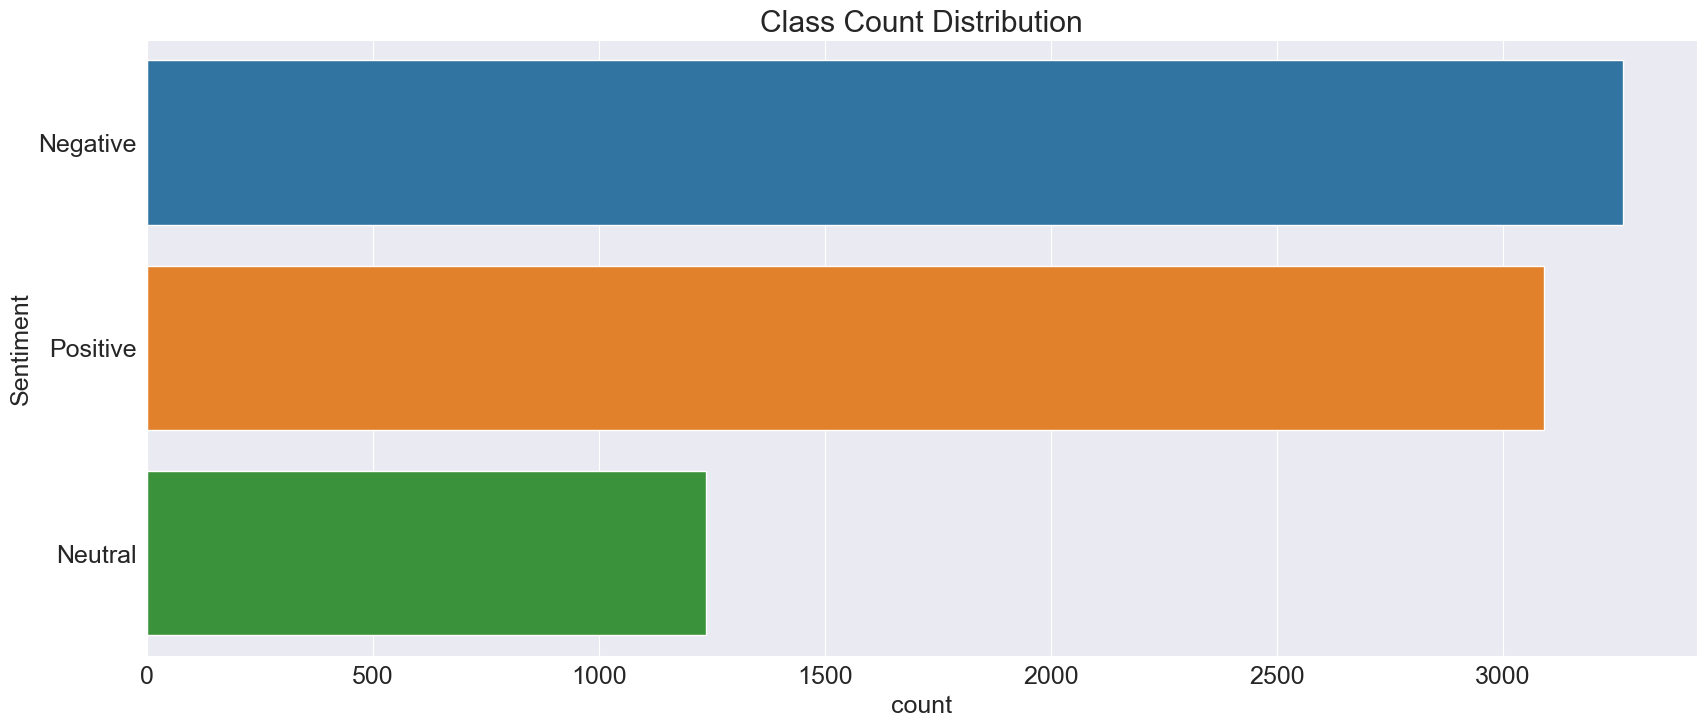

In [69]:
sns.countplot(data=data,y='Sentiment')
plt.title("Class Count Distribution")
plt.show()

In [70]:
positive_tweets = data.loc[data['Sentiment'] == 'Positive', 'OriginalTweet'].tolist()
negative_tweets = data.loc[data['Sentiment'] == 'Negative', 'OriginalTweet'].tolist()
neutral_tweets = data.loc[data['Sentiment'] == 'Neutral', 'OriginalTweet'].tolist()

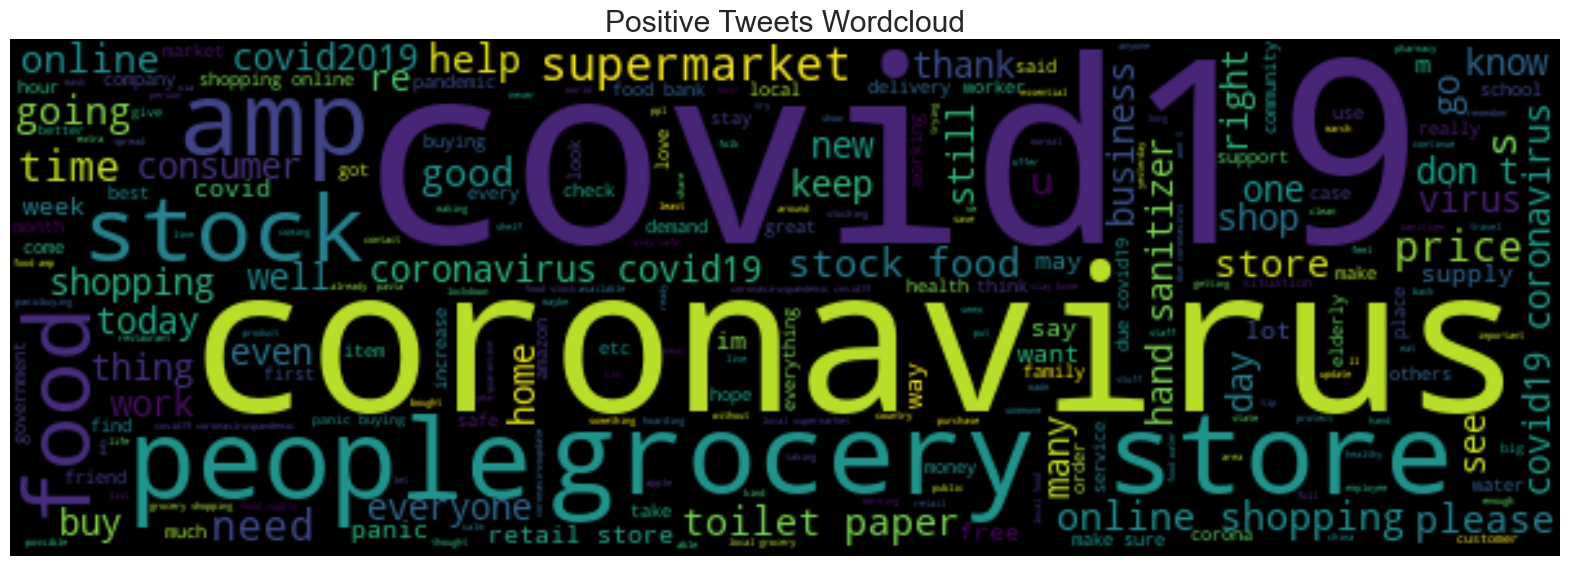

In [71]:
wordcloud = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(positive_tweets))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Positive Tweets Wordcloud")
plt.axis("off")
plt.show()

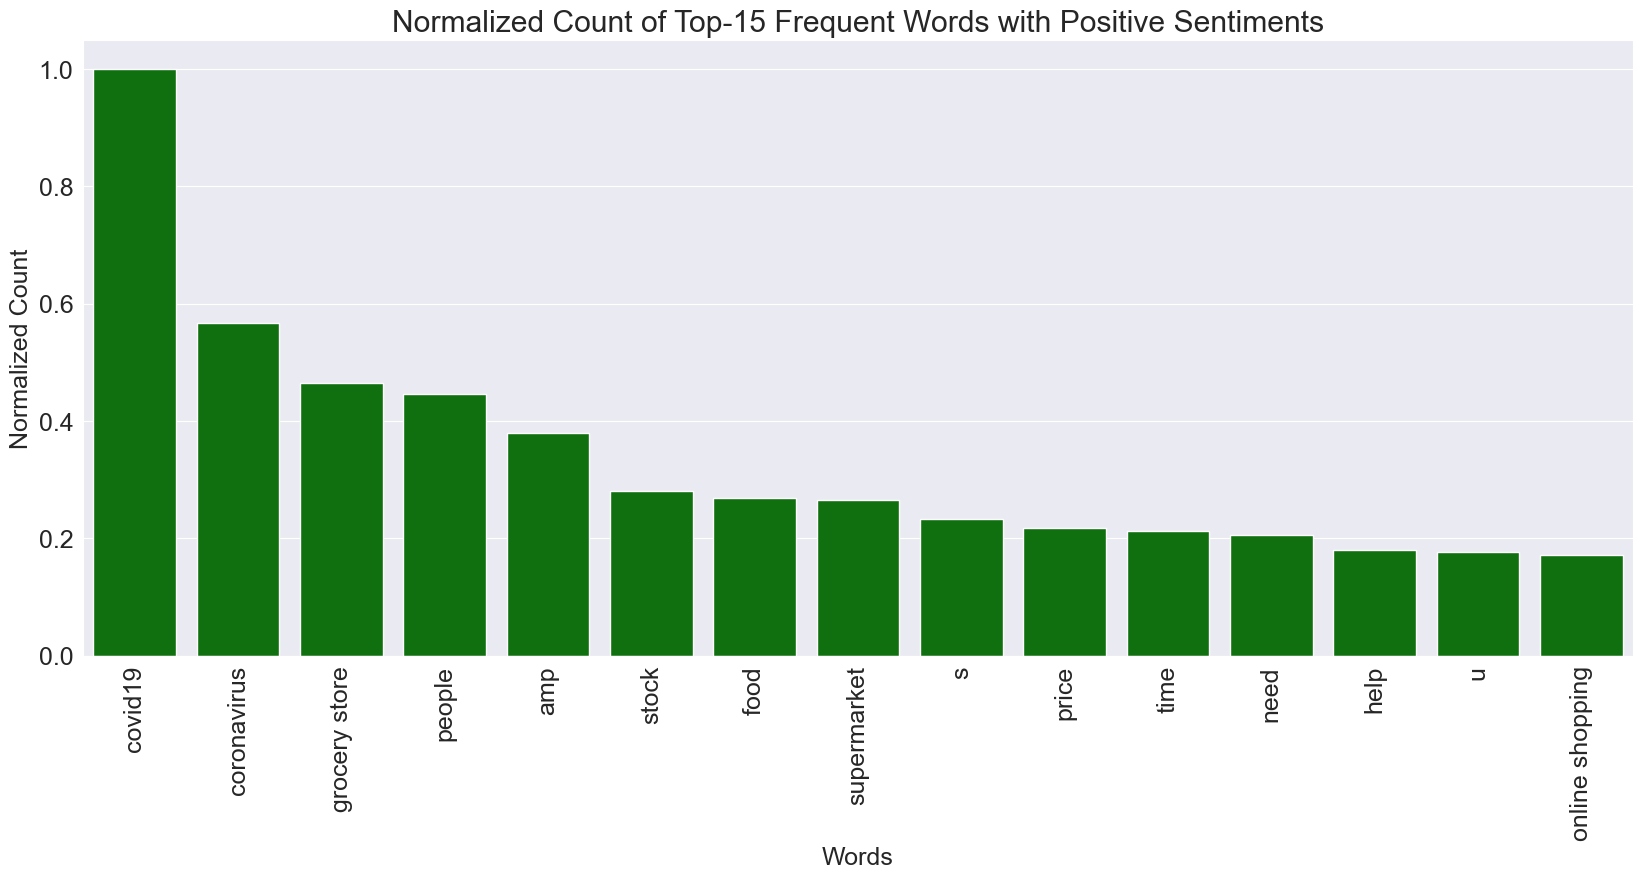

In [72]:
x = []
y = []
for key,value in wordcloud.words_.items(): # loop through the top 15 frequent words in the word cloud and append the word and its count to x and y lists
    x.append(key)
    y.append(value)
    if len(x) == 15:
        break
sns.barplot(x=x,y=y,color='green')
plt.title("Normalized Count of Top-15 Frequent Words with Positive Sentiments")
plt.xlabel("Words")
plt.ylabel("Normalized Count")
plt.xticks(rotation=90)
plt.show()

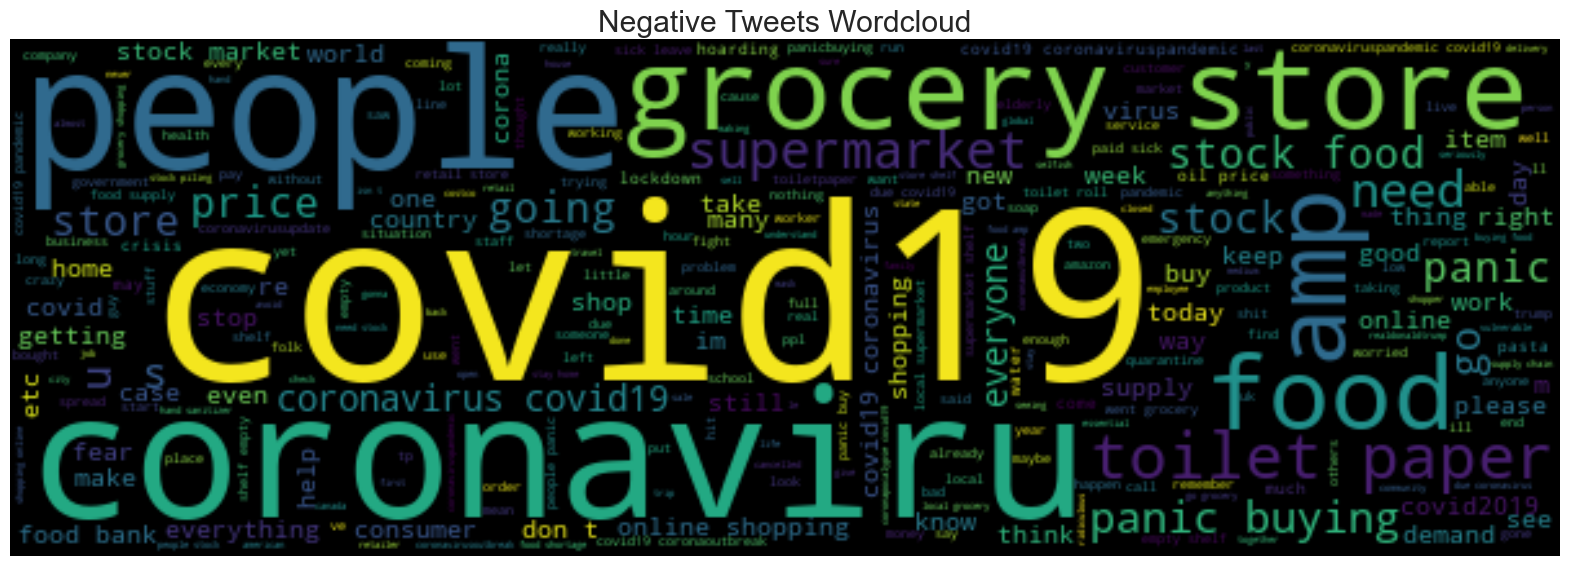

In [73]:
wordcloud = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(negative_tweets))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Negative Tweets Wordcloud")
plt.axis("off")
plt.show()

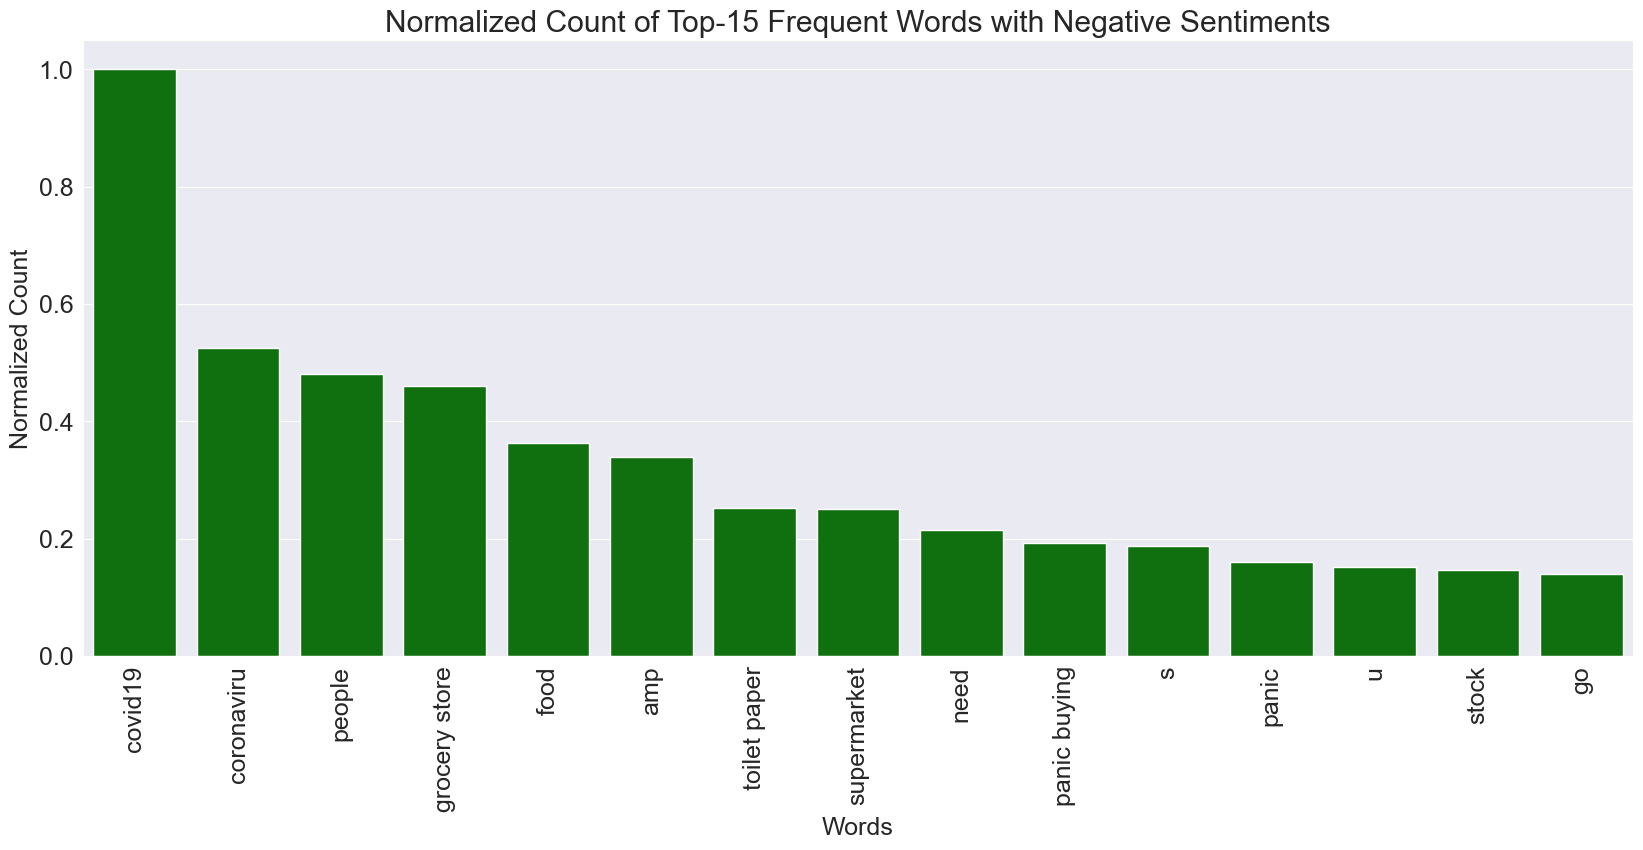

In [74]:
x = []
y = []
for key,value in wordcloud.words_.items(): # loop through the top 15 frequent words in the word cloud and append the word and its count to x and y lists
    x.append(key)
    y.append(value)
    if len(x) == 15:
        break
sns.barplot(x=x,y=y,color='green')
plt.title("Normalized Count of Top-15 Frequent Words with Negative Sentiments")
plt.xlabel("Words")
plt.ylabel("Normalized Count")
plt.xticks(rotation=90)
plt.show()

In [75]:
data['sentence_length'] = data['OriginalTweet'].progress_apply(lambda x: len(x.split()))

100%|██████████| 7596/7596 [00:00<00:00, 346198.26it/s]


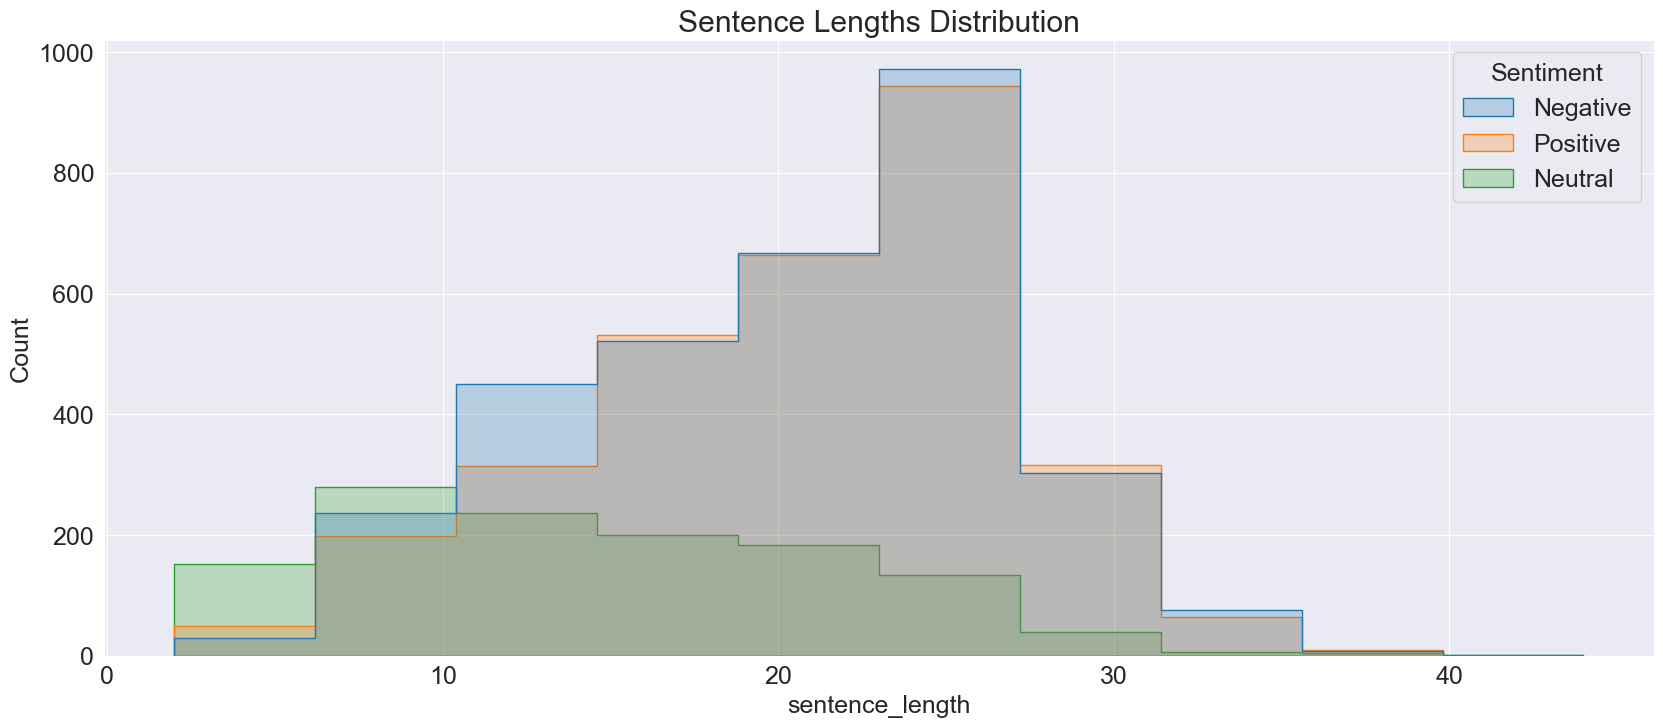

In [76]:
sns.histplot(data=data,x='sentence_length',hue='Sentiment',bins=10, element='step')
plt.title("Sentence Lengths Distribution")
plt.show()

In [77]:
data['sentence_length'].describe()

count    7596.000000
mean       19.489468
std         6.874576
min         2.000000
25%        14.000000
50%        20.000000
75%        25.000000
max        44.000000
Name: sentence_length, dtype: float64

In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Sentiment_encoded'] = le.fit_transform(data['Sentiment'])

In [79]:
data

,OriginalTweet,Sentiment,sentence_length,Sentiment_encoded
0,trending new yorkers encounter empty supermark...,Negative,18,0
1,could find hand sanitizer fred meyer turned am...,Positive,16,2
2,find protect loved one coronavirus,Positive,5,2
3,panic buying hit newyork city anxious shopper ...,Negative,27,0
4,toiletpaper dunnypaper coronavirus coronavirus...,Neutral,23,1
...,...,...,...,...
7591,meanwhile supermarket israel people dance sing...,Positive,10,2
7592,panic buy lot nonperishable item echo need foo...,Negative,18,0
7593,asst prof economics cconces nbcphiladelphia ta...,Neutral,14,1
7594,gov need somethings instead biar je rakyat ass...,Negative,24,0


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [81]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=2500)
X = vectorizer.fit_transform(data['OriginalTweet'].values.tolist()).toarray()
y = data['Sentiment_encoded'].values

In [82]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6076, 2500)
X_test shape: (1520, 2500)
y_train shape: (6076,)
y_test shape: (1520,)


In [86]:
def model_train(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred_tr = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("--------------------Training Performance---------------------")
    print(accuracy_score(y_train,y_pred_tr))
    print(classification_report(y_train,y_pred_tr))
    print("-------------------------------------------------------------")
    print("--------------------Testing Performance----------------------")
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
    sns.heatmap(confusion_matrix(y_test, y_pred),cmap='viridis',annot=True,fmt='.4g',
            xticklabels=['Negative','Positive', 'Neutral'],yticklabels=['Negative','Positive', 'Neutral'])
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()

--------------------Training Performance---------------------
0.7736998025016458
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      2611
           1       0.91      0.33      0.48       992
           2       0.79      0.83      0.81      2473

    accuracy                           0.77      6076
   macro avg       0.81      0.68      0.70      6076
weighted avg       0.79      0.77      0.76      6076

-------------------------------------------------------------
--------------------Testing Performance----------------------
0.694078947368421
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       655
           1       0.80      0.20      0.31       246
           2       0.70      0.76      0.73       619

    accuracy                           0.69      1520
   macro avg       0.73      0.59      0.60      1520
weighted avg       0.71      0.69      0.67      1520



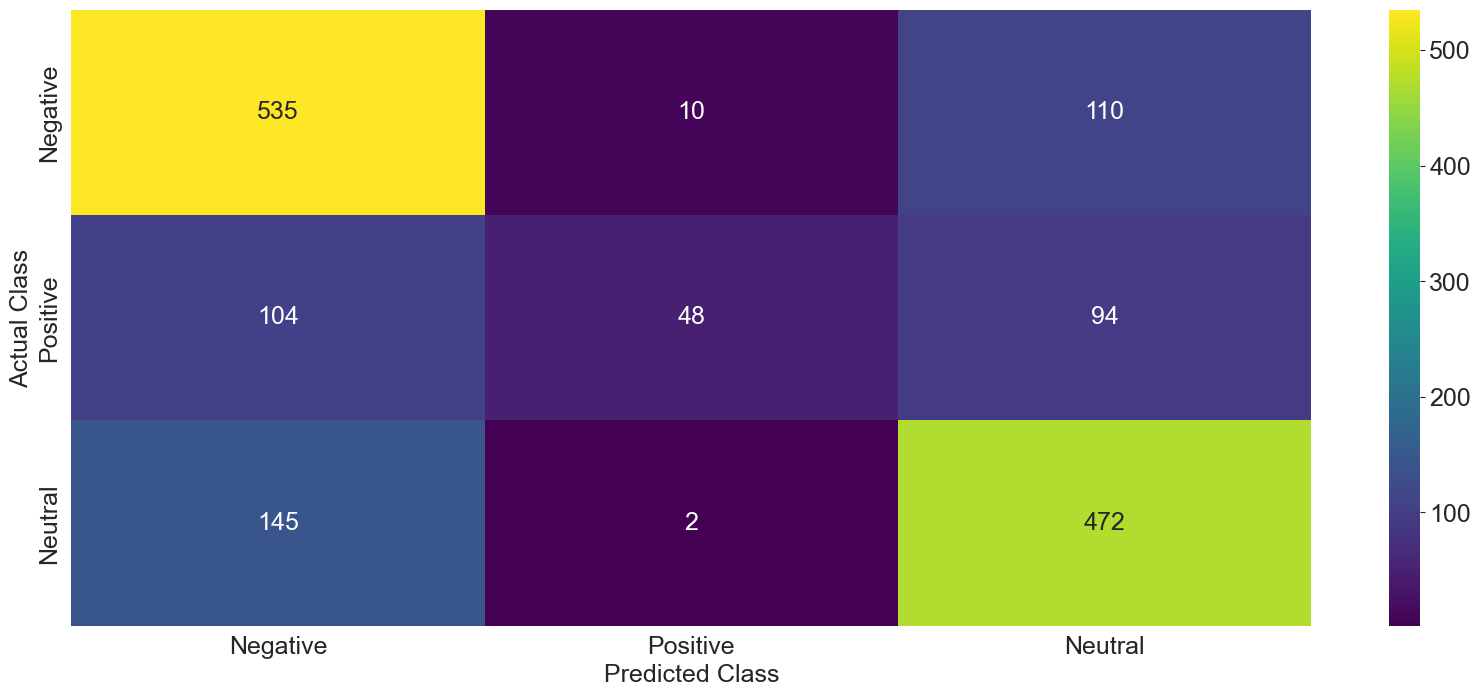

In [87]:
modelNB = MultinomialNB()
model_train(modelNB, X_train, X_test, y_train, y_test)

--------------------Training Performance---------------------
0.8936800526662277
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2611
           1       0.95      0.70      0.80       992
           2       0.89      0.93      0.91      2473

    accuracy                           0.89      6076
   macro avg       0.91      0.85      0.87      6076
weighted avg       0.90      0.89      0.89      6076

-------------------------------------------------------------
--------------------Testing Performance----------------------
0.7855263157894737
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       655
           1       0.84      0.48      0.61       246
           2       0.79      0.83      0.81       619

    accuracy                           0.79      1520
   macro avg       0.80      0.72      0.74      1520
weighted avg       0.79      0.79      0.78      1520



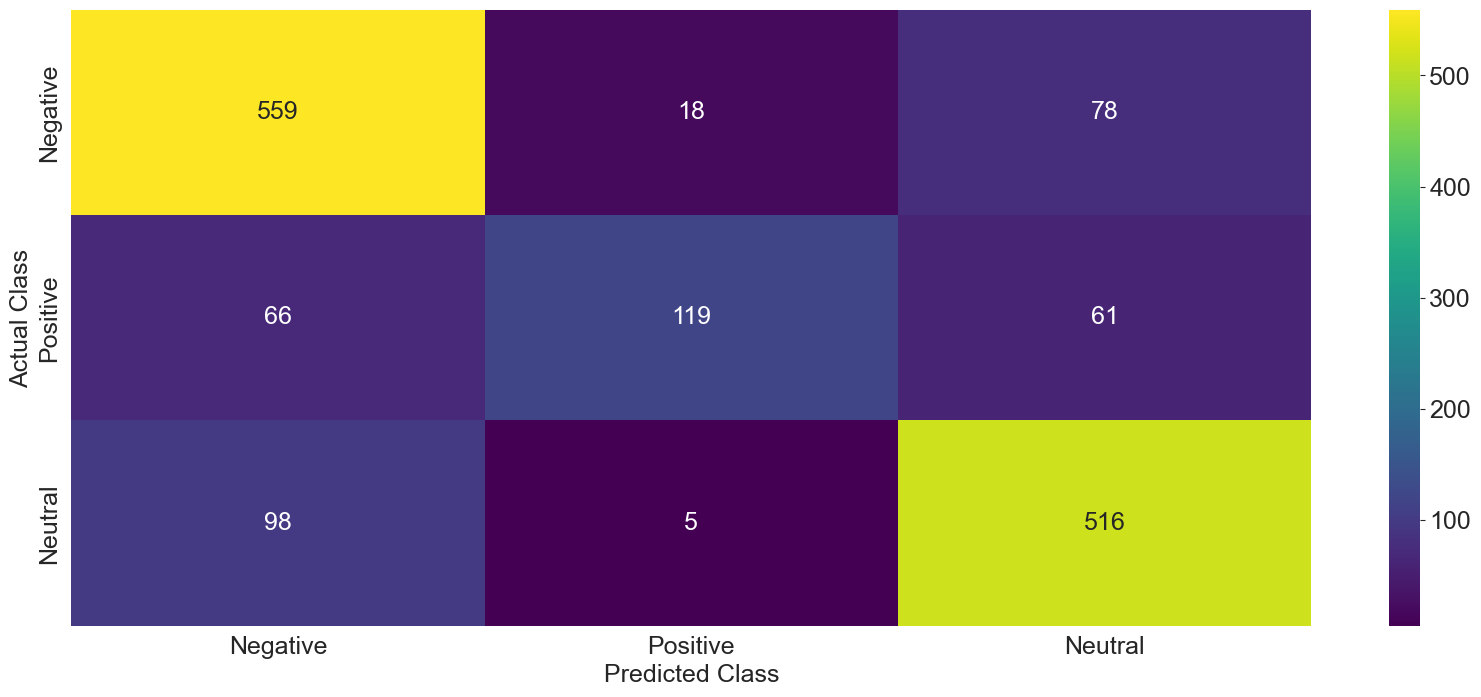

In [88]:
modelLR = LogisticRegression(max_iter=1000)
model_train(modelLR, X_train, X_test, y_train, y_test)

--------------------Training Performance---------------------
0.7707373271889401
              precision    recall  f1-score   support

           0       0.69      0.96      0.80      2611
           1       1.00      0.10      0.17       992
           2       0.89      0.84      0.86      2473

    accuracy                           0.77      6076
   macro avg       0.86      0.63      0.61      6076
weighted avg       0.82      0.77      0.72      6076

-------------------------------------------------------------
--------------------Testing Performance----------------------
0.694078947368421
              precision    recall  f1-score   support

           0       0.63      0.91      0.75       655
           1       0.85      0.04      0.08       246
           2       0.80      0.72      0.76       619

    accuracy                           0.69      1520
   macro avg       0.76      0.56      0.53      1520
weighted avg       0.73      0.69      0.64      1520



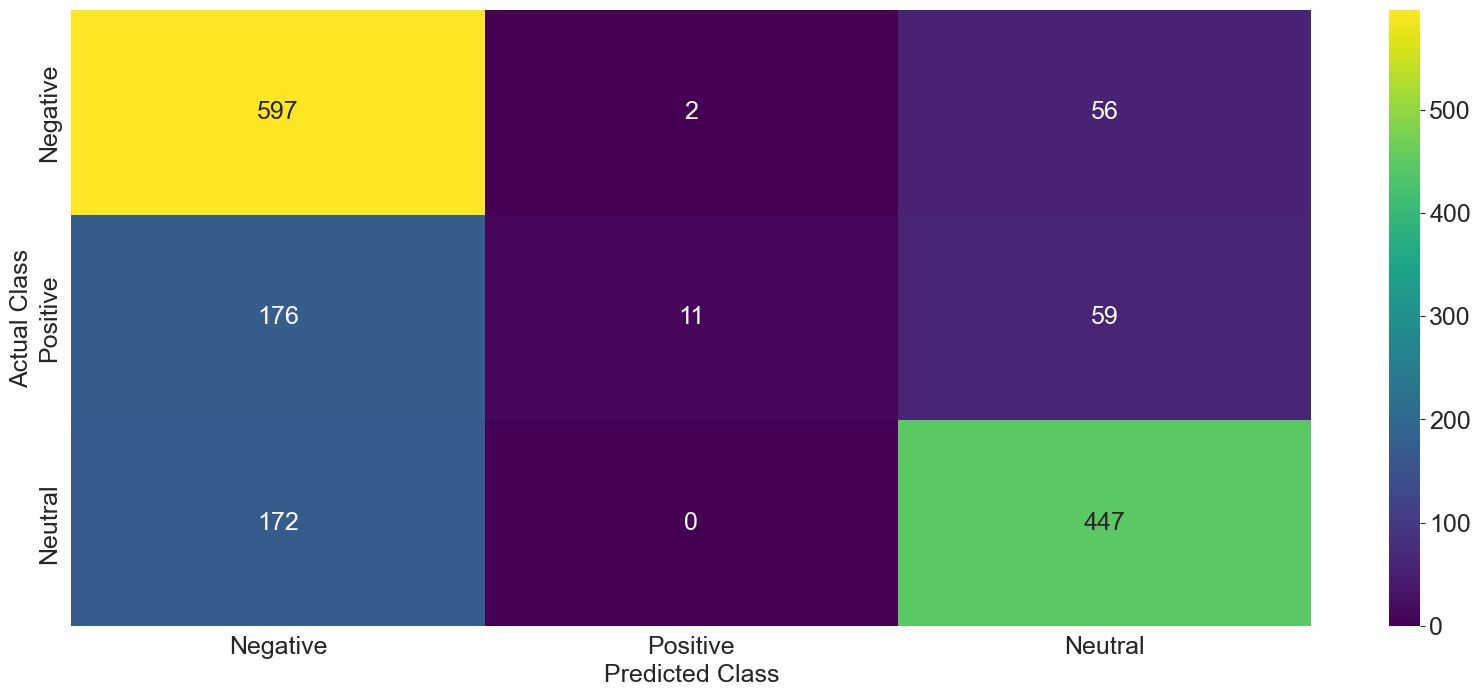

In [89]:
model = RandomForestClassifier(n_estimators=100,max_depth=15,max_features='sqrt')
model_train(model, X_train, X_test, y_train, y_test)